<a href="https://colab.research.google.com/github/ismailehasan1/Portfolio-Project---Data-Science---Python/blob/main/Predict_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Customer Churn with Python**

# Table of Contents

- 1 Introduction
- 2 Import libraries
- 3 Read dataset
- 4 Exploratory data analysis (EDA)
   - 4.1 Shape of dataset
   - 4.2 Preview dataset
   - 4.3 Summary of dataset
   - 4.4 Statistical properties of dataset
- 5 Feature selection
- 6 Convert categorical columns to numeric columns
    - 6.1 Explore Gender variable
    - 6.2 Explore Geography variable
- 7 Feature Scaling
- 8 Model Training
     - 8.1 Predict accuracy with different algorithms
     - 8.2 Plot the classifier accuracy scores
- 9 Feature Importance
    - 9.1 Feature importance with Random Forest model
    - 9.2 Drop least important feature
- 10 Confusion Matrix
- 11 Classification Metrices
       > 11.1 Classification Report
       > 11.2 Classification Accuracy
       > 11.3 Classification Error
       > 11.4 Precision
      > 11.5 Recall
      - 11.6 True Positive Rate
      - 11.7 False Positive Rate
      - 11.8 Specificity (True Negative Rate)
      - 11.9 f1 – score
      - 11.10 Support
- 12 Cross-Validation
- 13 Results and Conclusion
- 14 References

# **1. Introduction**

Customer churn (also known as customer attrition) is the loss of clients or customers. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. In this project, we will build a machine learning model to predict customer churn.

# **2. Import libraries**
We will start off by importing the required libraries.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

In [ ]:
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb

In [ ]:
# Classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score

# **3. Read dataset**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Customer Churn Analysis/Churn_Modelling.csv'


In [ ]:
df = pd.read_csv(file_path)

# **4. Exploratory Data Analysis**
Now, we will perform EDA to gain insights about our data.

# 4.1 Shape of dataset

In [ ]:
df.shape

(10000, 14)

Our dataset contains 10000 instances and 14 variables.

Now, let's take a quick look of our dataset.

# 4.2 Preview dataset

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 4.3 Summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We can see that there are 3 categorical variables and 11 numerical variables in the dataset.

Also, there are no missing values in the dataset.

# 4.4 Statistical properties of dataset

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **5 Feature selection**

- We can see that there are 14 variables in the dataset.

- The target variable is Exited and there are remaining 13 variables.

- All the remaining 13 variables are not useful for prediction. We have to select the relevant variables.

- So, first let's check the variables in the dataset.

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Not all columns affect the customer churn. Let's discuss each column one by one:

1. RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.
2. CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.
3. Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.
4. CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. Geography — a customer's location can affect their decision to leave the bank. We'll keep this column.
6. Gender — it's interesting to explore whether gender plays a role in a customer leaving the bank. We'll include this column, too.
7. Age —this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. NumOfProducts — refers to the number of products that a customer has purchased through the bank.
11. HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. IsActiveMember — active customers are less likely to leave the bank, so we'll keep this.
13. EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. Exited — whether or not the customer left the bank. This is what we have to predict.

So, we'll remove the RowNumber, CustomerId and Surname columns from our feature set. All the remaining columns do contribute to the customer churn in one way or another.

We can drop these columns as follows:

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

We can see that the above three columns are removed from the dataset.

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **6. Convert categorical columns to numeric columns**
Now, in our dataset, we have two categorical columns: **Gender** and **Geography**. We should convert them into numerical format.

# 6.1 Explore Gender variable

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
# Map 'Male' to 0 and 'Female' to 1 in the 'Gender' column
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


Now, let's take a look again at our dataset.

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


# 6.2 Explore Geography variable

In [ ]:
df.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
6,822,France,0,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
8,501,France,0,44,4,142051.07,2,0,1,74940.50,0
9,684,France,0,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
# Map 'France' to 1, 'Germany' to 2, and 'Spain' to 3 in the 'Geography' column
df['Geography'] = df['Geography'].map({'France': 1, 'Germany': 2, 'Spain': 3})


In [ ]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,3,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,3,1,43,2,125510.82,1,1,1,79084.10,0
5,645,3,0,44,8,113755.78,2,1,0,149756.71,1
6,822,1,0,50,7,0.00,2,1,1,10062.80,0
7,376,2,1,29,4,115046.74,4,1,0,119346.88,1
8,501,1,0,44,4,142051.07,2,0,1,74940.50,0
9,684,1,0,27,2,134603.88,1,1,1,71725.73,0


# **7. Feature Scaling**

In [160]:
X =  df.drop(['Exited'], axis=1)
y = df['Exited']

In [161]:
cols = X.columns

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [163]:
X = pd.DataFrame(X, columns=[cols])

In [164]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


# **8. Model Training**

We can see that our dataset is now ready to be fed into a ML model. We will proceed as follows:-

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 8.1 Predict accuracy with different algorithms
Let's predict accuracy with different algorithms and evaluate their performance.

In [166]:
names = ["Logistic Regression", "Nearest Neighbors", "Naive Bayes", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting",
         "LDA", "QDA", "Neural Net", "XGBoost" ]

In [167]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(kernel = "rbf", gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
    xgb.XGBClassifier()
   ]

In [168]:
accuracy_scores = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.8155
Nearest Neighbors  :  0.835
Naive Bayes  :  0.8285
Linear SVM  :  0.8035
RBF SVM  :  0.808
Decision Tree  :  0.8575
Random Forest  :  0.823


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost  :  0.853
Gradient Boosting  :  0.8655
LDA  :  0.813
QDA  :  0.8335
Neural Net  :  0.8635
XGBoost  :  0.861


In [169]:
classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})
classifiers_performance

,Classifiers,Accuracy Scores
0,Logistic Regression,0.8155
1,Nearest Neighbors,0.8350
2,Naive Bayes,0.8285
3,Linear SVM,0.8035
4,RBF SVM,0.8080
5,Decision Tree,0.8575
6,Random Forest,0.8230
7,AdaBoost,0.8530
8,Gradient Boosting,0.8655
9,LDA,0.8130


The accuracy score of top performing algorithms in descending order is given below

In [170]:
classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

,Classifiers,Accuracy Scores
8,Gradient Boosting,0.8655
11,Neural Net,0.8635
12,XGBoost,0.8610
5,Decision Tree,0.8575
7,AdaBoost,0.8530
1,Nearest Neighbors,0.8350
10,QDA,0.8335
2,Naive Bayes,0.8285
6,Random Forest,0.8230
0,Logistic Regression,0.8155


# 8.2 Plot the classifier accuracy scores

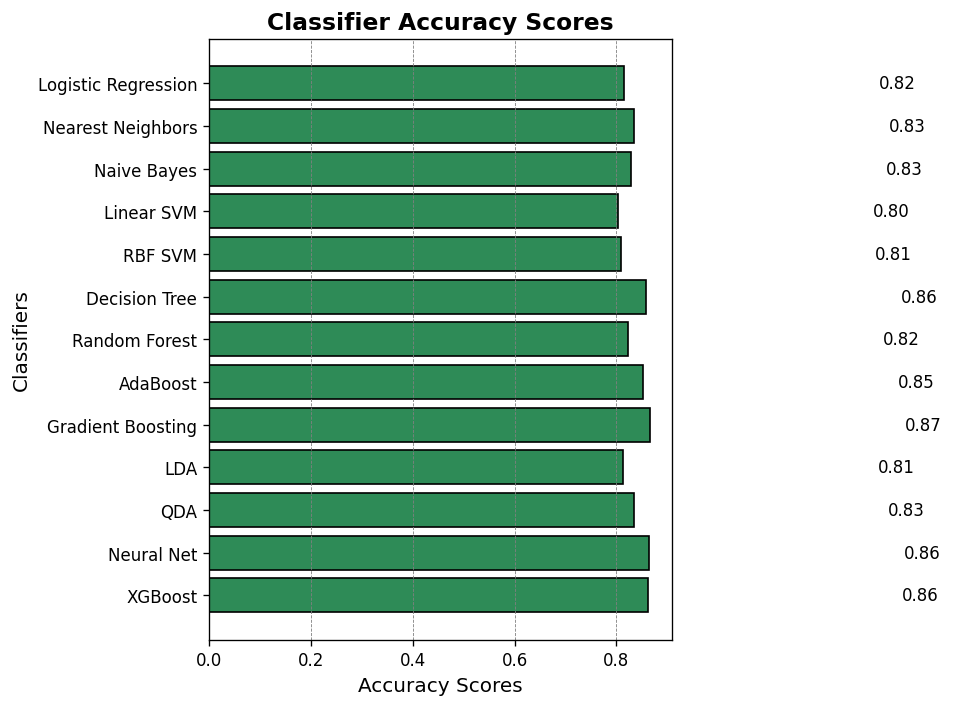

In [173]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi = 120)  # Slightly larger figure for better clarity

# Data for the plot
x = classifiers_performance['Accuracy Scores']
y = classifiers_performance['Classifiers']

# Create horizontal bar chart
bars = ax.barh(y, x, align='center', color='seagreen', edgecolor='black')

# Invert y-axis to have the highest accuracy at the top
ax.invert_yaxis()

# Label x and y axes
ax.set_xlabel('Accuracy Scores', fontsize=12)
ax.set_ylabel('Classifiers', fontsize=12)
ax.set_title('Classifier Accuracy Scores', fontsize=14, weight='bold')

# Add gridlines
ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)

# Add accuracy values on each bar
for bar in bars:
    ax.text(
        bar.get_width() + 0.5,  # Slightly offset from the bar for clarity
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}',  # Format to two decimal places
        va='center', ha='left', color='black', fontsize=10
    )

plt.tight_layout()  # Adjust layout for better fit
plt.show()



# **9. Feature Importance**

In this section, we will see how to improve model performance by feature selection.

We will visualize feature importance with random forest classifier and drop the least important feature, rebuild the model and check effect on accuracy.

For a comprehensive overview on feature selection techniques, please see the kernel -


[A Reference Guide to Feature Selection Methods](https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection?scriptVersionId=47174422)

# 9.1 Feature importance with Random Forest model
Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

First, I will create the Random Forest model as follows:-

In [174]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the classifier to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [175]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
Age,0.237264
EstimatedSalary,0.146918
CreditScore,0.142521
Balance,0.138975
NumOfProducts,0.132509
Tenure,0.082531
IsActiveMember,0.043244
Geography,0.037296
Gender,0.019587
HasCrCard,0.019155


We can see that the most important feature is **Age **and least important feature is **Gender** and **Having credit card.**

# 9.2 Drop least important feature
Now, I will drop the least important feature **Gender** from the model, rebuild the model and check its effect on accuracy.

In [176]:
# drop the least important feature Gender from X_train and X_test for further analysis
X1_train = X_train.drop(['Gender'], axis=1)
X1_test = X_test.drop(['Gender'], axis=1)

<ipython-input-176-fcbf786eb679>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X1_train = X_train.drop(['Gender'], axis=1)
<ipython-input-176-fcbf786eb679>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X1_test = X_test.drop(['Gender'], axis=1)


In [177]:
accuracy_scores1 = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X1_train, y_train)
    score = clf.score(X1_test, y_test)
    score = round(score, 4)
    accuracy_scores1.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.8075
Nearest Neighbors  :  0.8495
Naive Bayes  :  0.8305
Linear SVM  :  0.8035
RBF SVM  :  0.8185
Decision Tree  :  0.858
Random Forest  :  0.8145


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost  :  0.859
Gradient Boosting  :  0.864
LDA  :  0.8055
QDA  :  0.8355
Neural Net  :  0.8615
XGBoost  :  0.856


In [179]:
classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

,Classifiers,Accuracy Scores
8,Gradient Boosting,0.8655
11,Neural Net,0.8635
12,XGBoost,0.8610
5,Decision Tree,0.8575
7,AdaBoost,0.8530
1,Nearest Neighbors,0.8350
10,QDA,0.8335
2,Naive Bayes,0.8285
6,Random Forest,0.8230
0,Logistic Regression,0.8155


Now, we will compare our original accuracy and latest accuracy from the model.

In [178]:
classifiers_performance1 = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores,
                                         "Accuracy Scores1": accuracy_scores1})
classifiers_performance1

,Classifiers,Accuracy Scores,Accuracy Scores1
0,Logistic Regression,0.8155,0.8075
1,Nearest Neighbors,0.8350,0.8495
2,Naive Bayes,0.8285,0.8305
3,Linear SVM,0.8035,0.8035
4,RBF SVM,0.8080,0.8185
5,Decision Tree,0.8575,0.8580
6,Random Forest,0.8230,0.8145
7,AdaBoost,0.8530,0.8590
8,Gradient Boosting,0.8655,0.8640
9,LDA,0.8130,0.8055


In [180]:
classifiers_performance1.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

,Classifiers,Accuracy Scores
8,Gradient Boosting,0.8655
11,Neural Net,0.8635
12,XGBoost,0.8610
5,Decision Tree,0.8575
7,AdaBoost,0.8530
1,Nearest Neighbors,0.8350
10,QDA,0.8335
2,Naive Bayes,0.8285
6,Random Forest,0.8230
0,Logistic Regression,0.8155


- We can see that dropping the least important feature Gender from the model does not result in performance improvement.


- We can see that Gradient Boosting has maximum accuracy of 0.8655.

- So, we will use the XGBoost Classifier to plot the confusion-matrix.

# **10. Confusion Matrix**

- A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

- Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

- True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

- False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

- False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

- These four outcomes are summarized in a confusion matrix.

- We will use the XGBoost Classifier to plot the confusion-matrix.

In [183]:
# instantiate the XGBoost classifier
xgb_clf = xgb.XGBClassifier()


# fit the classifier to the modified training set
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [184]:
# predict on the test set
y_pred = xgb_clf.predict(X_test)

In [185]:
# print the accuracy
print('XGBoost Classifier model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost Classifier model accuracy score: 0.8610


In [186]:
# print confusion-matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1523   84]
 [ 194  199]]

True Positives(TP) =  1523

True Negatives(TN) =  199

False Positives(FP) =  84

False Negatives(FN) =  194


The confusion matrix shows 1523 + 199 = 1722 correct predictions and 84 + 194 = 278 incorrect predictions.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 1523
- True Negatives (Actual Negative:0 and Predict Negative:0) - 199
- False Positives (Actual Negative:0 but Predict Positive:1) - 84 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 194 (Type II error)

<Axes: >

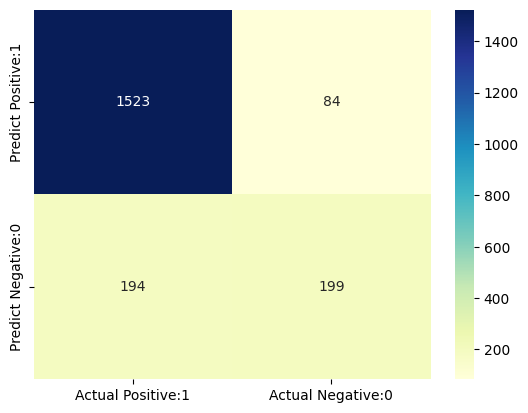

In [187]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **11. Classification Metrices**


# 11.1 Classification Report
Classification Report is another way to evaluate the classification model performance.
It displays the precision, recall, f1 and support scores for the model.
We can print a classification report as follows:-

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# 11.2 Classification Accuracy

In [189]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [190]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8610


# 11.3 Classification Error

In [191]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1390


# 11.4 Precision
- Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

- So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

- Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [192]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9477


# 11.5 Recall
- Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN).

- Recall is also called Sensitivity.

- Recall identifies the proportion of correctly predicted actual positives.

- Mathematically, Recall can be given as the ratio of TP to (TP + FN).

In [193]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8870


# 11.6 True Positive Rate
True Positive Rate is synonymous with Recall.

In [194]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8870


# 11.7 False Positive Rate

In [195]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2968


# 11.8 Specificity (True Negative Rate)
Specificity is also called True Negative Rate.

In [196]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7032


# 11.9 f1-score
- f1-score is the weighted harmonic mean of precision and recall.
- The best possible f1-score would be 1.0 and the worst would be 0.0.
- f1-score is the harmonic mean of precision and recall.
- So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
- The weighted average of f1-score should be used to compare classifier models, not global accuracy.

# 11.10 Support
Support is the actual number of occurrences of the class in our dataset.

**# 12. Cross Validation**
We will check whether Cross Validation results in performance improvement.

In [197]:
# iterate over classifiers and calculate cross-validation score
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
    print(name , ':{:.4f}'.format(scores.mean()))

Logistic Regression :0.8065
Nearest Neighbors :0.8275
Naive Bayes :0.8280
Linear SVM :0.7945
RBF SVM :0.7990
Decision Tree :0.8546
Random Forest :0.8126


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost :0.8525
Gradient Boosting :0.8608
LDA :0.8039
QDA :0.8341
Neural Net :0.8581
XGBoost :0.8484


It can be seen that cross-validation does not result in performance improvement.

# **13. Results and Conclusion**

In this project, we build an ML model to predict the churn-rate of the customer. We can see the following result:

- There are no missing values in the dataset.
- RowNumber, CustomerId and Surname have no predictive power. So, we have dropped them from the dataset.
- There are two categorical variables - Gender and Geography. We have converted them into numerical variable.
- We have trained the model with different algorithms and compare their accuracy.
- Gradient Boosting fared better than other algorithms and resulted in maximum accuracy of 0.866.
- We find the most important feature as Age and least important feature as Gender. Dropping the least important feature Gender does not result in performance improvement.
- We find :-
  - True Positives (Actual Positive:1 and Predict Positive:1) - 1557
  - True Negatives (Actual Negative:0 and Predict Negative:0) - 175
  - False Positives (Actual Negative:0 but Predict Positive:1) - 50 (Type I error)
  - False Negatives (Actual Positive:1 but Predict Negative:0) - 218 (Type II error)
- Cross-validation does not result in performance improvement.

# **14. References**
This notebook is inspired from the following notebook-

- https://learnpython.com/blog/python-customer-churn-prediction/